https://www.salesanalytics.co.jp/datascience/datascience003/

STL分解（Seasonal Decomposition Of Time Series）です

In [1]:
import pandas as pd                      #基本ライブラリー
from statsmodels.tsa.seasonal import STL #STL分解
import matplotlib.pyplot as plt          #グラフ描写

In [2]:
#グラフのスタイル
plt.style.use('ggplot')

In [3]:
url='https://www.salesanalytics.co.jp/591h' #データセットのあるURL
table=pd.read_csv(url,                      #読み込むデータのURL
                  index_col='Month',        #変数「Month」をインデックスに設定
                  parse_dates=True)         #インデックスを日付型に設定

In [5]:
table.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
plt.rcParams['figure.figsize'] = [12, 9]

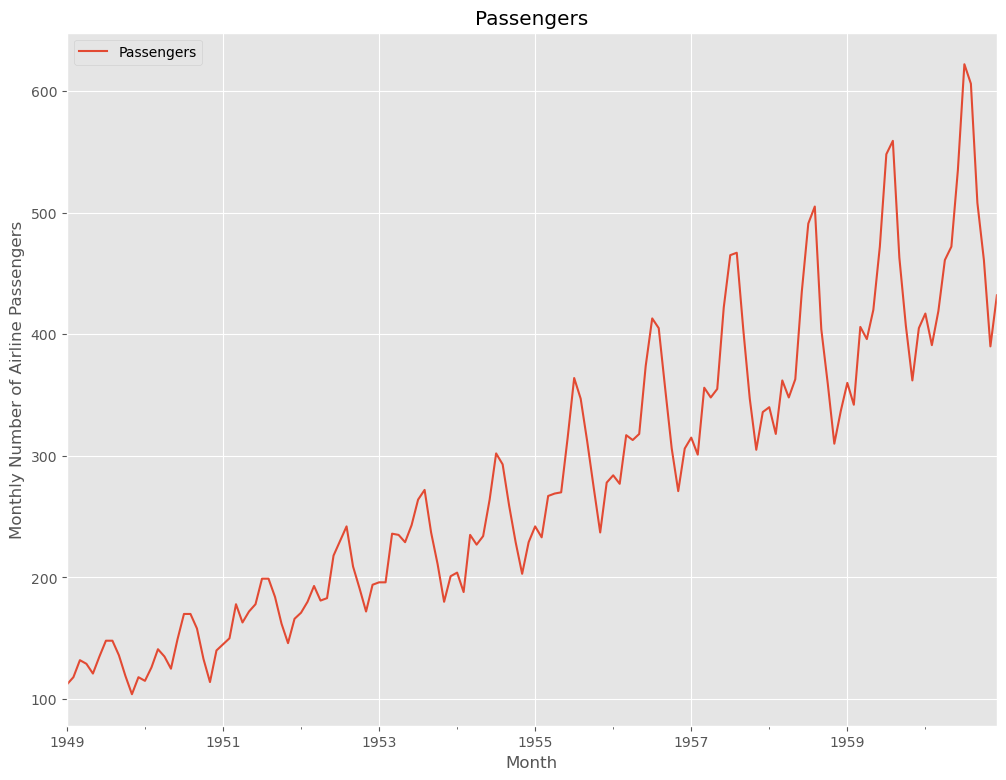

In [8]:
table.plot()
plt.title('Passengers')                            #グラフタイトル
plt.ylabel('Monthly Number of Airline Passengers') #タテ軸のラベル
plt.xlabel('Month')                                #ヨコ軸のラベル
plt.show()

# 元データ　＝　トレンド　＋　季節性　＋　残差

In [9]:
# STL分解
stl=STL(table['Passengers'], period=12, robust=True)
stl_series = stl.fit()

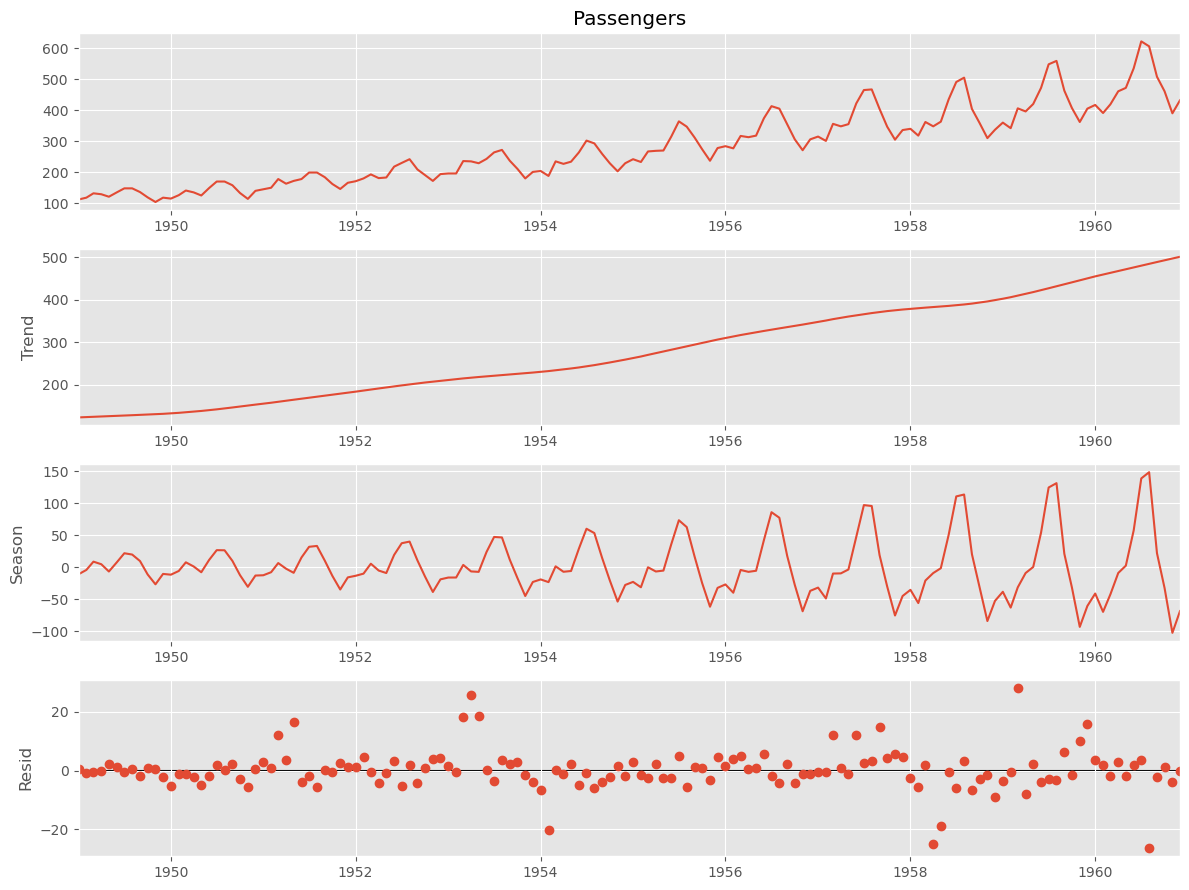

In [10]:
stl_series.plot()
plt.show()

STL分析（Seasonal and Trend decomposition using Loess）は、時系列データを季節性、トレンド、残差の3つの要素に分解する手法です。ここで、残差は、元の時系列データから季節性とトレンドを取り除いた後の部分を指します。

残差は、季節性やトレンドが取り除かれた後に残る「残りの部分」であり、一般的にはランダムな変動やノイズが含まれています。残差は、時系列データの特性やパターンを理解する上で重要な役割を果たします。特に、残差がランダムに分布している場合、元のデータが適切にモデル化されており、季節性やトレンドが正しく除去されていることを示します。

STL分析の残差を調べることで、元の時系列データがどの程度季節性やトレンドに影響されているか、またその影響がランダムな変動やノイズとして残っているかを評価することができます。

In [11]:
stl_o = stl_series.observed #観測データ（STL分解前の元のデータ）＝トレンド＋季節性＋残差
stl_t = stl_series.trend    #トレンド（trend）
stl_s = stl_series.seasonal #季節性（seasonal）
stl_r = stl_series.resid    #残差（resid）

In [12]:
stl_t

Month
1949-01-01    122.551738
1949-02-01    123.275243
1949-03-01    124.002100
1949-04-01    124.733907
1949-05-01    125.473075
                 ...    
1960-08-01    484.204696
1960-09-01    488.360599
1960-10-01    492.496567
1960-11-01    496.613048
1960-12-01    500.710813
Name: trend, Length: 144, dtype: float64

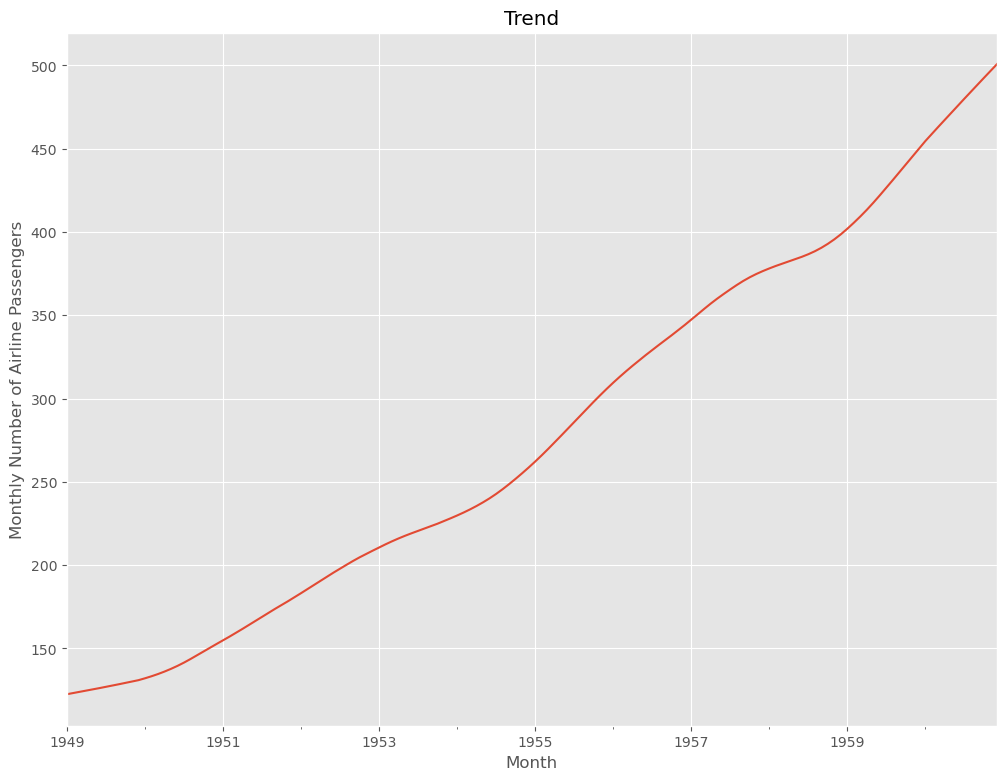

In [13]:
stl_t.plot()
plt.title('Trend')                                 #グラフタイトル
plt.ylabel('Monthly Number of Airline Passengers') #タテ軸のラベル
plt.xlabel('Month')                                #ヨコ軸のラベル
plt.show()

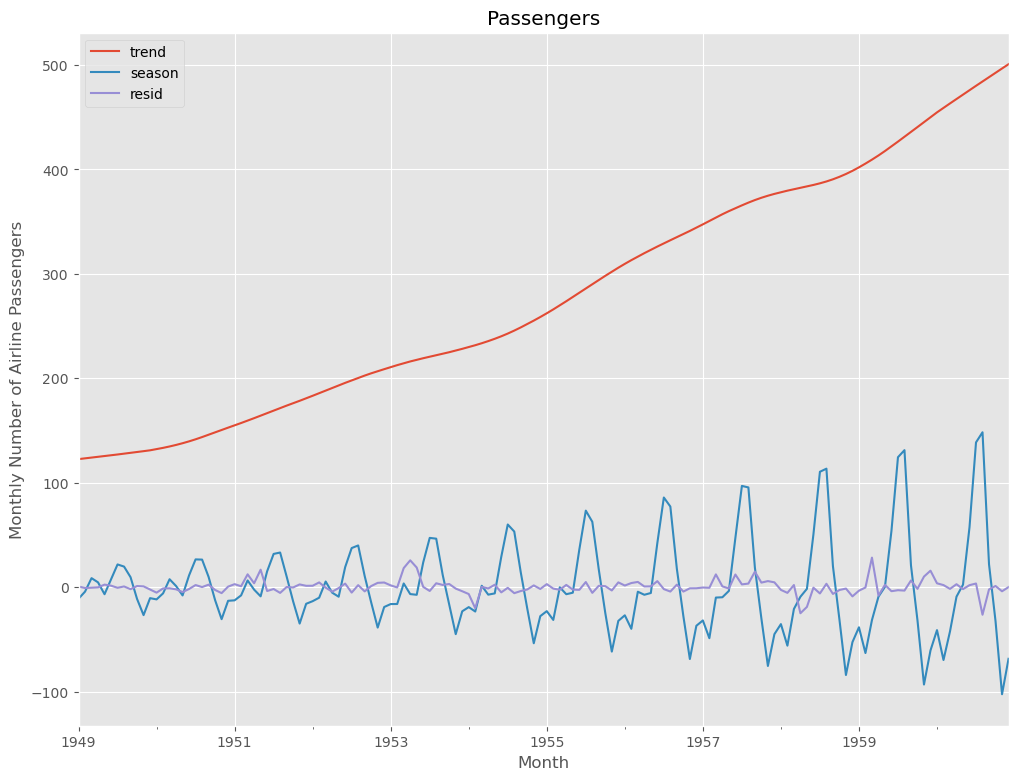

In [14]:
stl_t.plot()                                       #トレンド（trend）のグラフ描写
stl_s.plot()                                       #季節性（season）のグラフ描写
stl_r.plot()                                       #残差（resid）のグラフ描写
plt.title('Passengers')                            #グラフタイトル
plt.ylabel('Monthly Number of Airline Passengers') #タテ軸のラベル
plt.xlabel('Month')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

トレンドと季節性に比べ、残差（resid）が非常に小さいことご分かります。要は、元データはトレンドと季節性でほぼ構成されているということです。

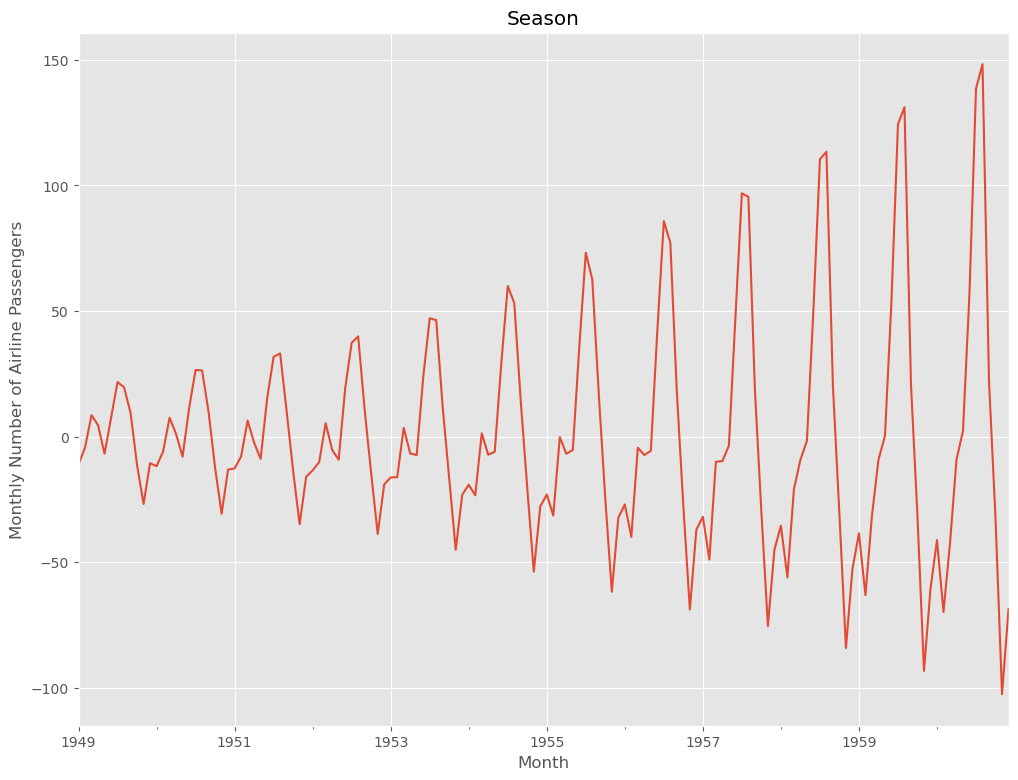

In [17]:
stl_s.plot()
plt.title('Season')                                 #グラフタイトル
plt.ylabel('Monthly Number of Airline Passengers') #タテ軸のラベル
plt.xlabel('Month')                                #ヨコ軸のラベル
plt.show()